Tabulating and calculating relevant values for Sr-O-Ph molecule. Based on the experimental data from https://arxiv.org/pdf/2209.13025.pdf.

### Transitions wavelengths in wavenumbers (1/cm)

In [23]:
# To the vibrational ground state
XA_wn = 16212.7
XB_wn = 16353.2

# Vibrational state separations
v1 = 44 #  low-frequency bending mode
v3 = 312 # strongest offdiagonal stretching mode

### Transition wavelength in nanometers

In [24]:
XAv0 = 1e7/XA_wn
XBv0 = 1e7/XB_wn
XAv1 = 1e7/(XA_wn-v1)
XAv3 = 1e7/(XA_wn-v3)
XBv1 = 1e7/(XB_wn-v1)
XBv3 = 1e7/(XB_wn-v3)

In [25]:
print("XA", XAv0, XAv1, XAv3, "nm")
print("XB", XBv0, XBv1, XBv3, "nm")

XA 616.8004095554719 618.4789129614626 628.9031300508782 nm
XB 611.5011129320255 613.1508596375052 623.3947584968705 nm


### Branching ratios

In [26]:
bA0, bA1, bA3 = 0.9339, 0.0113, 0.0468
bB0, bB1, bB3 = 0.9446, 0.0056, 0.0419

### Lifetime in nanoseconds

In [27]:
tau_A = 23.5
tau_B = 26.1

### Spontaneous emission rate in MHz

In [28]:
import numpy as np

Gamma_A = 1e3/(tau_A*2*np.pi)
Gamma_B = 1e3/(tau_B*2*np.pi)

In [29]:
Gamma_A, Gamma_B, 'MHz'

(6.772550769867887, 6.097890539919361, 'MHz')

In [30]:
Gamma_A0 = Gamma_A*bA0
Gamma_A1 = Gamma_A*bA1
Gamma_A3 = Gamma_A*bA3

Gamma_A0, Gamma_A1, Gamma_A3, 'MHz'

(6.324885163979619, 0.07652982369950712, 0.3169553760298171, 'MHz')

In [31]:
Gamma_B0 = Gamma_B*bB0
Gamma_B1 = Gamma_B*bB1
Gamma_B3 = Gamma_B*bB3

Gamma_B0, Gamma_B1, Gamma_B3, 'MHz'

(5.760067404007828, 0.034148187023548424, 0.25550161362262125, 'MHz')

### Saturation intensity

The saturation intensity is defined by

 $I_s = \dfrac{\pi}{3}\dfrac{hc}{\lambda^3\tau}=\dfrac{\pi}{3}\dfrac{hc\Gamma}{\lambda^3}$.

 ALso, instead of using the fundamental constants, it can be calculated using the known $I_s$ and the wavelength if different element (e.g., 87Rb):

$I_1 = I_2\left(\dfrac{\lambda_1}{\lambda_2}\right)^3\dfrac{\tau_1}{\tau_2}$

In [32]:
h = 6.6260687652*1e-34 # J*s
c = 2.99792458*1e8 # m/s

In [33]:
I_A0 = bA0*(h*c/(tau_A*1e-9))*(XAv0*1e-9)**(-3)*np.pi/3 # W/m^2
I_A1 = bA1*(h*c/(tau_A*1e-9))*(XAv1*1e-9)**(-3)*np.pi/3 # W/m^2
I_A3 = bA3*(h*c/(tau_A*1e-9))*(XAv3*1e-9)**(-3)*np.pi/3 # W/m^2


In [34]:
I_A0/10, I_A1/10, I_A3/10, "mW/cm2"


(3.5229283658323425, 0.04228060080118812, 0.1665451468168583, 'mW/cm2')

In [35]:
I_B0 = bB0*(h*c/(tau_A*1e-9))*(XBv0*1e-9)**(-3)*np.pi/3 # W/m^2
I_B1 = bB1*(h*c/(tau_A*1e-9))*(XBv1*1e-9)**(-3)*np.pi/3 # W/m^2
I_B3 = bB3*(h*c/(tau_A*1e-9))*(XBv3*1e-9)**(-3)*np.pi/3 # W/m^2
I_B0/10, I_B1/10, I_B3/10, "mW/cm2"

(3.6567357964380016, 0.021504205412648213, 0.1530953433259903, 'mW/cm2')

### Put I_sat and Gamma for a particular trasition into a dictionary

In [36]:
A0 = {'I':I_A0 , 'Gamma': Gamma_A0}
A1 = {'I':I_A1 , 'Gamma': Gamma_A1}
A3= {'I':I_A3 , 'Gamma': Gamma_A3}

B0 = {'I':I_B0 , 'Gamma': Gamma_B0}
B1 = {'I':I_B1 , 'Gamma': Gamma_B1}
B3= {'I':I_B3 , 'Gamma': Gamma_B3}

In [37]:
A0['Gamma']

6.324885163979619

# Calculate the Rabi frequency as a function of Intensity

In [38]:
d = 1e-3 # beam diameter in meters
S = 0.25*np.pi*d**2
P = np.linspace(0,100,10000)*1e-3 # Laser power in W
I = P/S # Laser intensity in W/m^2

In [39]:
def Rabi(I, Dict):
    "In MHz"
    ISAT = Dict["I"]
    GAMMA = Dict["Gamma"]
    return GAMMA*np.sqrt(0.5*I/ISAT)
    

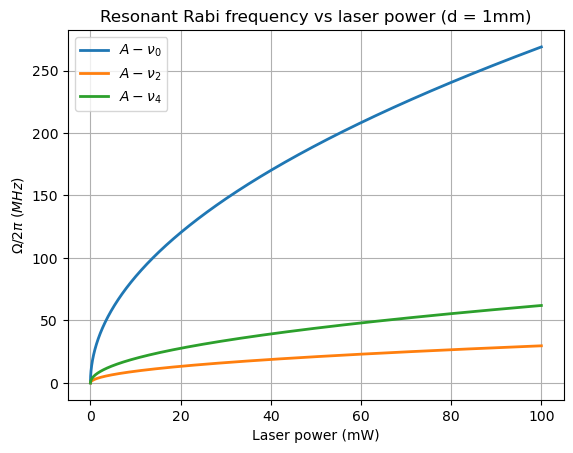

In [42]:
# Calculate the Rabi frequency for each transition to A state
W_A0 = Rabi(I,A0)
W_A1 = Rabi(I,A1)
W_A3 = Rabi(I,A3)

# Plot for transitions to A
import matplotlib.pyplot as plt
plt.plot(P*1e3, W_A0, label=r'$A -\nu_0$', lw=2)
plt.plot(P*1e3, W_A1, label=r'$A -\nu_2$',lw=2)
plt.plot(P*1e3, W_A3, label=r'$A -\nu_4$',lw=2)
plt.xlabel('Laser power (mW)')
plt.ylabel('$\Omega/2\pi\ (MHz)$')
plt.title('Resonant Rabi frequency vs laser power (d = 1mm)')
plt.grid()
plt.legend()
plt.show()

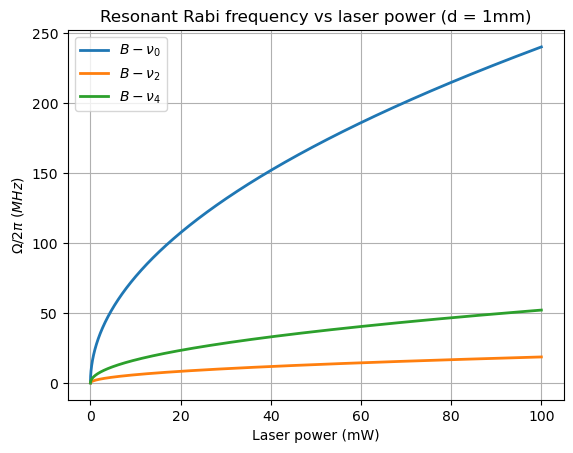

In [43]:
# Calculate the Rabi frequency for each transition to A state
W_B0 = Rabi(I,B0)
W_B1 = Rabi(I,B1)
W_B3 = Rabi(I,B3)

# Plot for transitions to A
import matplotlib.pyplot as plt
plt.plot(P*1e3, W_B0, label=r'$B -\nu_0$', lw=2)
plt.plot(P*1e3, W_B1, label=r'$B -\nu_2$',lw=2)
plt.plot(P*1e3, W_B3, label=r'$B -\nu_4$',lw=2)
plt.xlabel('Laser power (mW)')
plt.ylabel('$\Omega/2\pi\ (MHz)$')
plt.title('Resonant Rabi frequency vs laser power (d = 1mm)')
plt.grid()
plt.legend()
plt.show()